<h1> Bitcoin Stock Portfolio</h1><img src="../docs/kanchanara-dRgxo-ujT2U-unsplash.jpg" height=650px width=1250px>
Photo by <a href="https://unsplash.com/@kanchanara?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Kanchanara</a> on <a href="https://unsplash.com/photos/gold-and-black-round-star-print-dRgxo-ujT2U?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Unsplash</a>
  

## Background

Bitcoin was first introduced in a whitepaper titled "Bitcoin: A Peer-to-Peer Electronic Cash System" published in 2008 by an unknown entity that is identified by the name Satoshi Nakamoto. What was proposed in this whitepaper was a decentralized digital currency that could be transferred electronically without the need for a central authority, like central banks. The launch of the Bitcoin network began when Satoshi first mined a block of Bitcoin, known as the Genesis Block in January 2009. Its first transaction occurred when a programmer purchased two pizzas using 10,000 Bitcoins in May 2010. This is known today as the most expensive pizza order in history. Although Bitcoin struggled due to its volatility, it has attracted interest from investors, financial institutions, and tech companies, leading to a robust ecosystem around cryptocurrencies and blockchain technologies. Bitcoin has inspired the creation of thousands of alternative cryptocurrencies, fueling discussions of the future of money, finance and decentralization. This is Bitcoin's journey as a transformative force in the world of finance and technology.

S&P 500 was created in 1957 by a financial services company named Standard & Poor's, which is today called S&P Global. By design, it measures the performance of the 500 leading companies from various sectors, such as technology, healthcare, consumer goods, and financial services. Its key feature is its market capitalization weighting methodology which results in companies with higher market capitalization having a greater influence on the index's performance. This means larger companies like Google, Apple and Microsoft have a greater impact on the index compared to smaller companies. Many investors and financial professionals use the S&P 500 as a reference point to evaluate the performance of their portfolios or investment strategies. With its long history of the US economy, it makes it a great tool to assess market trends and make investment decisions. Changes in the value of the S&P 500 are closely watched by investors, economists, and policymakers as an indicator of the overall health of the US economy. Movements in the index can influence investor sentiment, market trends, and economic forecasts, making it a key barometer of market performance and investor confidence.

One of the most significant events in the history of gold is the California Gold Rush of 1848-1855, which led to a massive influx of prospectors seeking their fortunes in the gold fields of California. This event not only transformed the region but also had a lasting impact on the global economy. Gold has been used as a form of currency and a store of value for centuries. The first U.S. gold coin was struck in 1787, marking the beginning of the country's gold coinage. In the modern era, gold continues to be highly valued for its use in jewelry, electronics, and as a hedge against economic uncertainty. Central banks and investors around the world hold significant amounts of gold as a reserve asset.

The Consumer Price Index (CPI) is a crucial tool for measuring inflation and price changes in an economy. By tracking the average change in prices paid by consumers for a basket of goods and services over time, the CPI provides valuable insights into the cost of living and purchasing power. The CPI is calculated using a weighted average of prices for a diverse range of goods and services commonly purchased by consumers, such as food, housing, transportation, and healthcare. Changes in these prices are reflected in the CPI to gauge overall inflation levels. Economists, policymakers, and investors closely monitor the CPI to assess the impact of price changes on consumers, businesses, and the broader economy. Inflation trends derived from the CPI influence monetary policy decisions, wage negotiations, and investment strategies. The CPI serves as a valuable tool for adjusting wages, pensions, and government benefits to account for changes in the cost of living. It also helps individuals and businesses make informed financial decisions based on prevailing inflation rates.

## Problem Statement

The CFO of Investment Fund International is looking to diversify their portfolio further and they do not know much about the performance of Bitcoin. They are looking for a hedge against losses incase the traditional assets lose value. I plan to give a full analysis on Bitcoin's performance against indices like the S&P 500, Gold price and the Consumer Price Index (CPI). After this analysis, I will give recommendations to the CFO of whether Bitcoin is worth investing in or not.

## About the data

#### Bitcoin daily data in US dollars
- "date" - date from September 17, 2014 to November 17, 2021
- "open" - the price at the beginning of the trading day
- "high" - the highest price reached that day
- "low" - the lowest price reached that day
- "close" - the price at the closing of the trading day
- "volume" - how many Bitcoin were traded that day

#### S&P 500 daily data
- "date" - date from September 17, 2014 to November 17, 2021
- "open" - the index level at the beginning of the trading day
- "high" - the highest level reached that day
- "low" - the lowest level reached that day
- "close" - the level at the closing of the trading day
- "volume" - how many shares in the companies that make up the index were traded that day

#### inflation and gold as monthly data
- "date" - date from September, 2014 to November, 2021
- "gold_usd" - price in usd of gold for that month
- "cpi_us" - the inflation index for the US for that month (cpi = consumer price index)

_CPI data from the [U.S. Bureau of Labor Statistics](https://www.bls.gov/cpi/). Publicly available information_.

## 1.0 Import Libraries

In [2]:
#For dataframe and array manipulation
import pandas as pd
import numpy as np
#For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#For data imputing
from sklearn.impute import SimpleImputer
#For splitting data
from sklearn.model_selection import train_test_split
#For modelling
from sklearn.svm import LinearSVR
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [3]:
plt.style.use('ggplot')

## 2.0 Import data

In [4]:
#Importing and previewing the first 5 rows of Bitcoin data
bitcoin = pd.read_csv('../data/bitcoin-usd.csv', parse_dates=['date'], index_col=['date'])
display(bitcoin.head())
display(bitcoin.tail())

,open,high,low,close,volume
date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100.0


,open,high,low,close,volume
date,,,,,
2021-11-13,64158.121094,64915.675781,63303.734375,64469.527344,3.047423e+10
2021-11-14,64455.371094,65495.179688,63647.808594,65466.839844,2.512209e+10
2021-11-15,65521.289063,66281.570313,63548.144531,63557.871094,3.055876e+10
2021-11-16,63721.195313,63721.195313,59016.335938,60161.246094,4.684434e+10
2021-11-17,59967.230469,66304.296875,58838.714844,60276.031250,4.089261e+10


In [5]:
#Importing and previewing the first 5 rows of S&P 500 data
sp500 = pd.read_csv('../data/sp500.csv', parse_dates=['date'], index_col=['date'])
display(sp500.head())
display(sp500.tail())

,open,high,low,close,volume
date,,,,,
2014-09-17,1999.300049,2010.739990,1993.290039,2001.569946,3209420000
2014-09-18,2003.069946,2012.339966,2003.069946,2011.359985,3235340000
2014-09-19,2012.739990,2019.260010,2006.589966,2010.400024,4880220000
2014-09-22,2009.079956,2009.079956,1991.010010,1994.290039,3349670000
2014-09-23,1992.780029,1995.410034,1982.770020,1982.770020,3279350000


,open,high,low,close,volume
date,,,,,
2021-11-09,4707.250000,4708.529785,4670.870117,4685.250000,3110230000
2021-11-10,4670.259766,4684.850098,4630.859863,4646.709961,3581630000
2021-11-11,4659.390137,4664.549805,4648.310059,4649.270020,2623140000
2021-11-12,4655.240234,4688.470215,4650.770020,4682.850098,2865790000
2021-11-15,4689.299805,4697.419922,4672.859863,4682.799805,2618980000


In [6]:
#Importing and previewing the first 5 rows of Gold and CPI data
gold_cpi = pd.read_csv('../data/monthly_data.csv', parse_dates=['date'], index_col=['date']) 
display(gold_cpi.head())
display(gold_cpi.tail())

,gold_usd,cpi_us
date,,
2014-09-01,1241.330,237.852
2014-10-01,1223.565,238.031
2014-11-01,1176.413,237.433
2014-12-01,1200.440,236.151
2015-01-01,1249.333,234.812


,gold_usd,cpi_us
date,,
2021-07-01,1774.8,271.696
2021-08-01,1817.0,273.003
2021-09-01,1816.7,273.567
2021-10-01,1757.2,274.310
2021-11-01,1785.3,276.589


In [7]:
#Inspecting the datasets for missing values and data type inconsistencies
#Inspecting Bitcoin data
bitcoin.info()
print(f'There are {bitcoin.shape[0]} rows and {bitcoin.shape[1]} columns in the Bitcoin dataset')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2619 entries, 2014-09-17 to 2021-11-17
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2615 non-null   float64
 1   high    2615 non-null   float64
 2   low     2615 non-null   float64
 3   close   2615 non-null   float64
 4   volume  2615 non-null   float64
dtypes: float64(5)
memory usage: 122.8 KB
There are 2619 rows and 5 columns in the Bitcoin dataset


There are no missing values in the date column. The remaining 5 columns have missing values of 4 observations/rows. The volume column should be an integer datatype, instead of float.

In [8]:
#Inspecting the S&P 500 data
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1805 entries, 2014-09-17 to 2021-11-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1805 non-null   float64
 1   high    1805 non-null   float64
 2   low     1805 non-null   float64
 3   close   1805 non-null   float64
 4   volume  1805 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 84.6 KB


There are no mmissing values in the S&P 500 dataset.

In [9]:
#Inspecting the Gold and CPI data
gold_cpi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87 entries, 2014-09-01 to 2021-11-01
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gold_usd  87 non-null     float64
 1   cpi_us    87 non-null     float64
dtypes: float64(2)
memory usage: 2.0 KB


There are no missing values in the Gold and CPI datset.

## 3.0 Exploratory Data Analysis

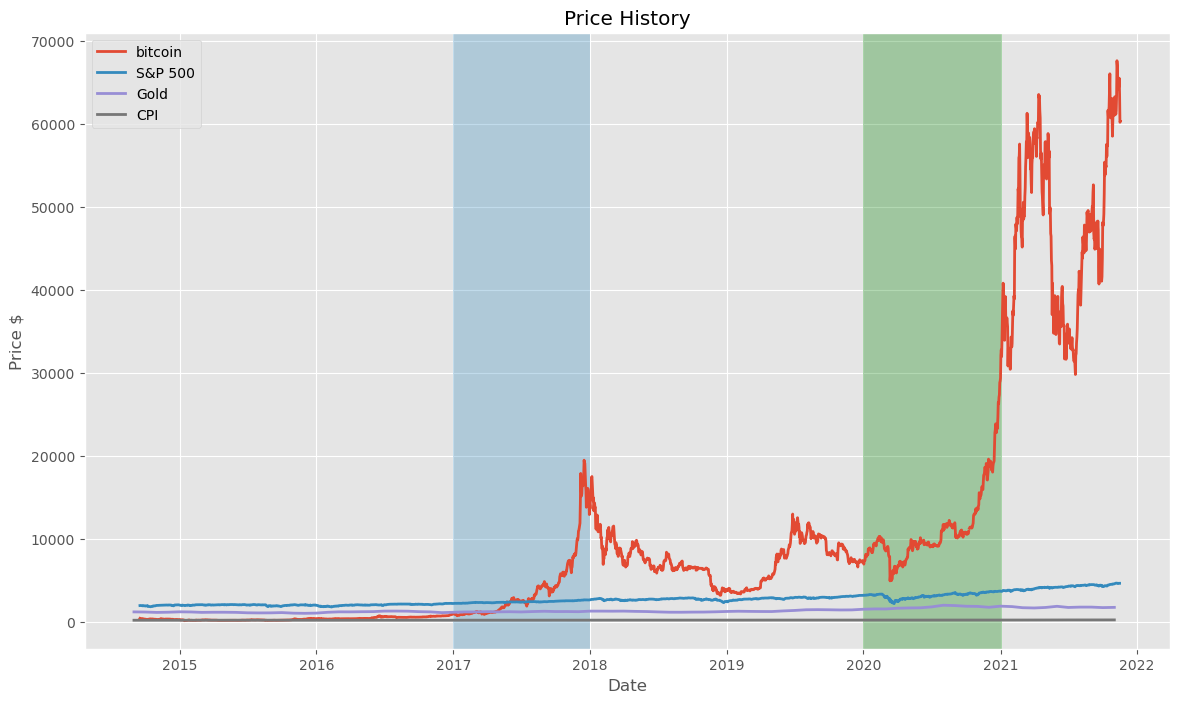

In [121]:
fig = plt.figure(figsize=(14,8))
plt.plot(bitcoin.index, bitcoin['close'], label='bitcoin', linewidth=2.0)
plt.plot(sp500.index, sp500['close'], label='S&P 500', linewidth=2.0)
plt.plot(gold_cpi.index, gold_cpi['gold_usd'], label='Gold', linewidth=2.0)
plt.plot(gold_cpi.index, gold_cpi['cpi_us'], label='CPI', linewidth=2.0)
plt.title('Price History')
plt.xlabel('Date')
plt.ylabel('Price $')
plt.axvspan('2017', '2018', alpha=0.3)
plt.axvspan('2020', '2021', alpha=0.3, color='green')
plt.legend()
plt.show()

Bitcoin price gained its momentum first at the year end 2017 when the price peaked close to $20,000.00. This was fueled by a number of factors, some of which include:
- mainstream consciousness in 2017 increased interest amongst investors and the public. News coverage also fueled excitement and investment.
- the launch of Bitcoin futures trading on the Chicago Board Options Exchange (CBOE) in December 2017 brought legitimacy and wider participation, further inflating the price.
- as the price rose rapidly, more people jumped in to buy, fearing they'd miss out on the gains. This created a self-fulfilling cycle where rising demand pushed the price even higher.

In John Edwards' article (2024) he mentions that in 2020, the economy shut down due to the COVID-19 pandemic. He proceeds to explain how Bitcoin's price burst into action once again. The cryptocurrency opened the year at $7,161. The pandemic shutdown and subsequent government policies fed investors' fears about the global economy and accelerated Bitcoin's rise.
At the close on Nov. 23, Bitcoin was trading for $18,383. Bitcoin's price closed at $28,993 on Dec. 31, 2020, increasing 416% from the start of that year.

To understand Bitcoin better, I needed to investigate the volatility of the asset.

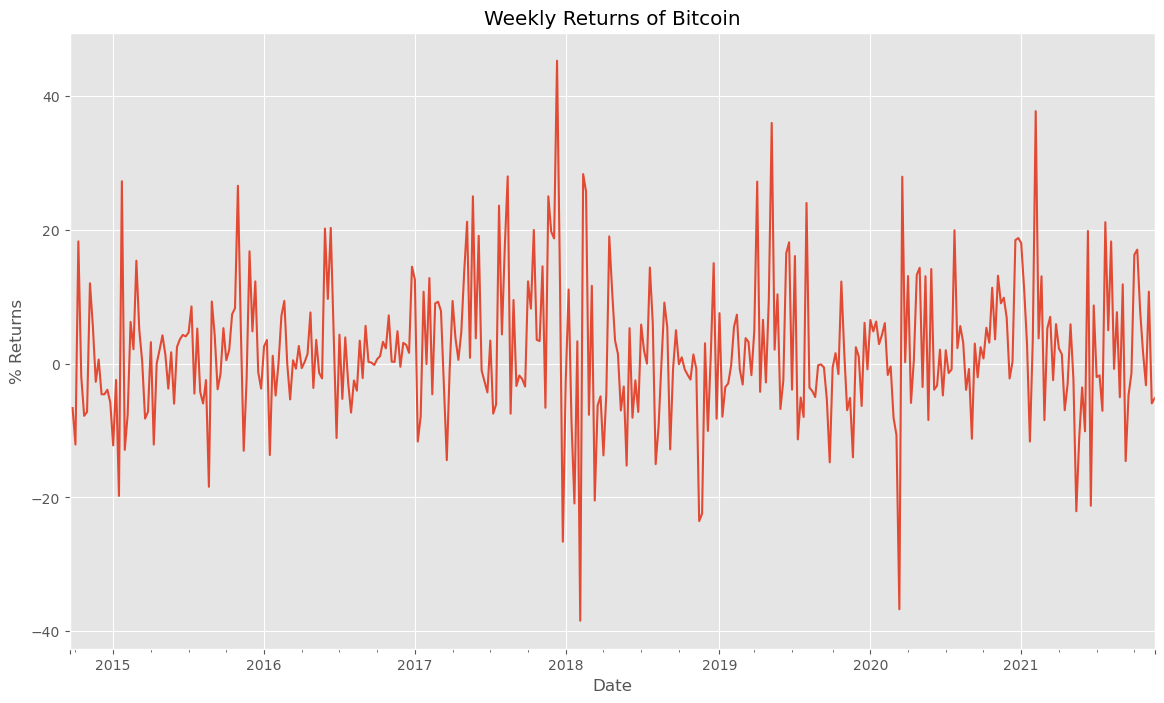

In [11]:
btc_weekly_prices = bitcoin.resample("W-MON")['close'].last()
btc_weekly_returns = btc_weekly_prices.pct_change() * 100
btc_weekly_returns.plot(figsize=(14,8))
plt.title('Weekly Returns of Bitcoin')
plt.xlabel('Date')
plt.ylabel('% Returns')
plt.show()

In [12]:
# Calculating weekly volatility
weekly_volatility = btc_weekly_returns.std() * np.sqrt(252) # Annualizing for comparison
print(f"The weekly volatility of Bitcoin (annualized): {weekly_volatility:.2f}%")

The weekly volatility of Bitcoin (annualized): 166.06%


A weekly volatility of 166% implies that, on average, Bitcoin's price went up or down by 166% relative to the average weekly price during the analyzed period. This is a very high volatility, signifying significant swings in Bitcoin's price each week. It suggests a very risky investment compared to assets with lower weekly volatility. This volatility is based on historical data. The volatility represents an average.

To understand the volatility of the Bitcoin I will proceed to plot the standard deviation over time.

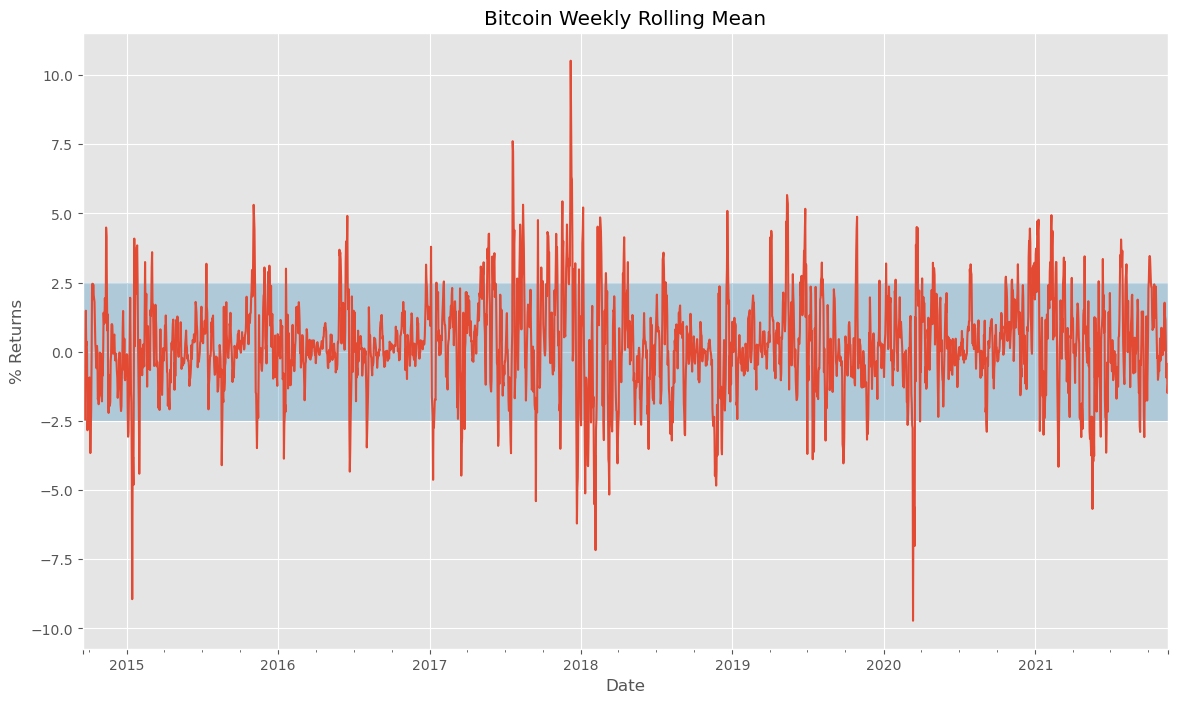

In [13]:
btc_daily_returns = bitcoin['close'].pct_change() * 100
weekly_rolling_volatility = btc_daily_returns.rolling(window=5).std() * np.sqrt(252)
weekly_rolling_mean = btc_daily_returns.rolling(window=5).mean()

fig, ax = plt.subplots(figsize=(14,8))
weekly_rolling_mean.plot()
plt.axhspan(-2.5, 2.5, alpha=0.3)
plt.xlabel("Date")
plt.ylabel("% Returns")
plt.title("Bitcoin Weekly Rolling Mean")
plt.show()

The average price change in percentage per week lies between -2.5% and 2.5% with occasional spikes and dips going beyond these values. This paints a picture of the returns to be expected on a short-term basis. This suggests a mostly sideways or stagnant trend. The occasional spikes and dips beyond these values indicate volatility in the price movements.

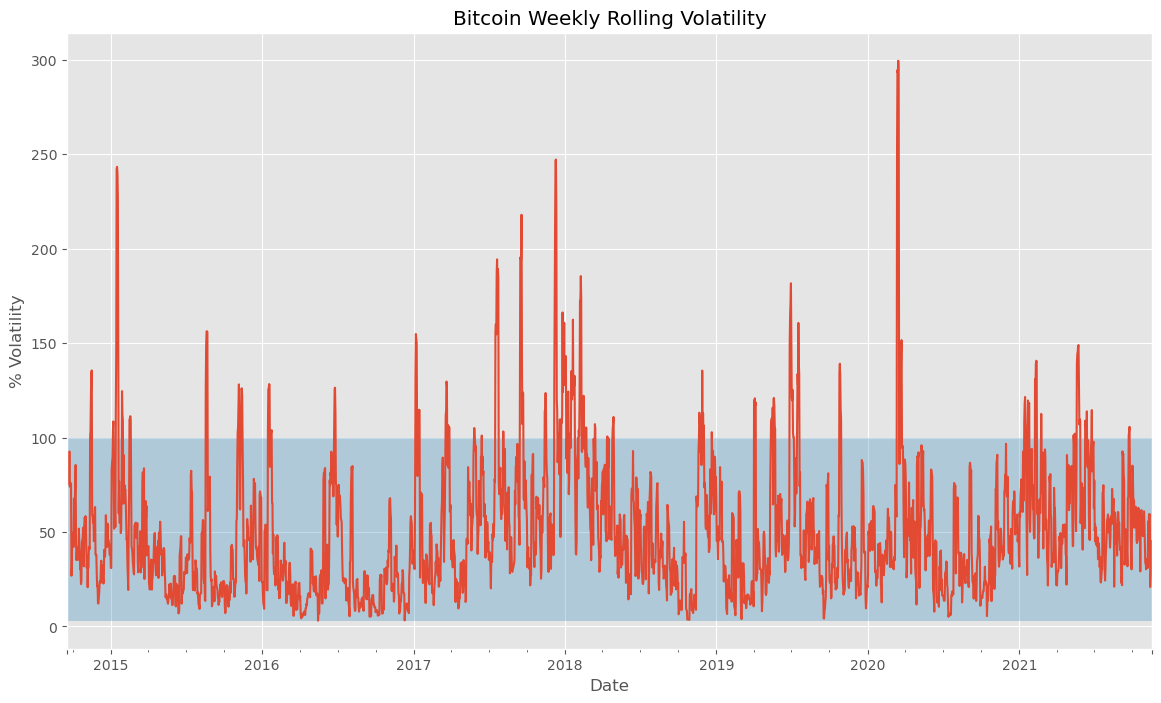

In [15]:
fig, ax = plt.subplots(figsize=(14,8))
weekly_rolling_volatility.plot()
plt.axhspan(3.05, 100.0, alpha=0.3)
plt.xlabel("Date")
plt.ylabel("% Volatility")
plt.title("Bitcoin Weekly Rolling Volatility")
plt.show()

A rolling standard deviation between 3.05% and 80% indicates significant volatility in Bitcoin's price. This means the price fluctuates considerably over short periods (weeks in this case). The occasional spikes reaching 300% suggest the presence of outliers in the data. High volatility and outliers are characteristics of a risky asset. High volatility presents opportunities for significant profits but also carries the risk of substantial losses.

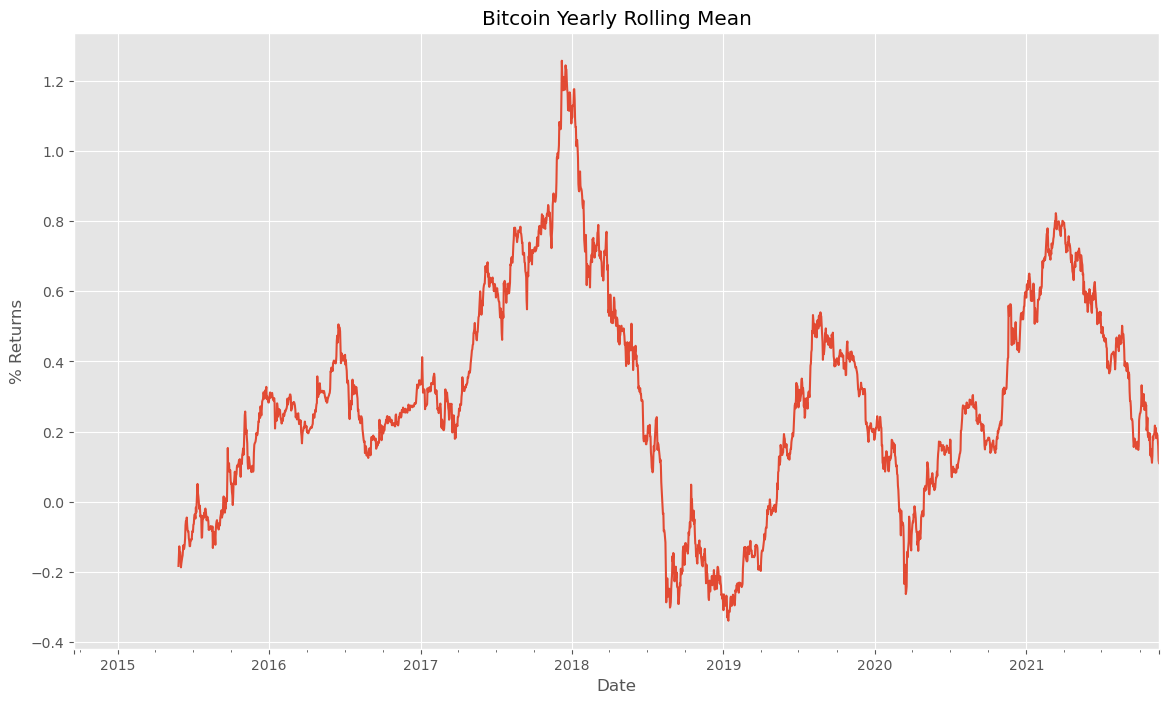

In [16]:
yearly_rolling_volatility = btc_daily_returns.rolling(window=252).std() * np.sqrt(252)
yearly_rolling_mean = btc_daily_returns.rolling(window=252).mean()

fig, ax = plt.subplots(figsize=(14,8))
#rolling_volatility.plot(legend=True, label="Rolling Vlatility (Annualized)")
yearly_rolling_mean.plot()
plt.xlabel("Date")
plt.ylabel("% Returns")
plt.title("Bitcoin Yearly Rolling Mean")
plt.show()

The average price change in percentage per year is unpredictable in the sense that it follows no particular trend or cyclical seasonality.

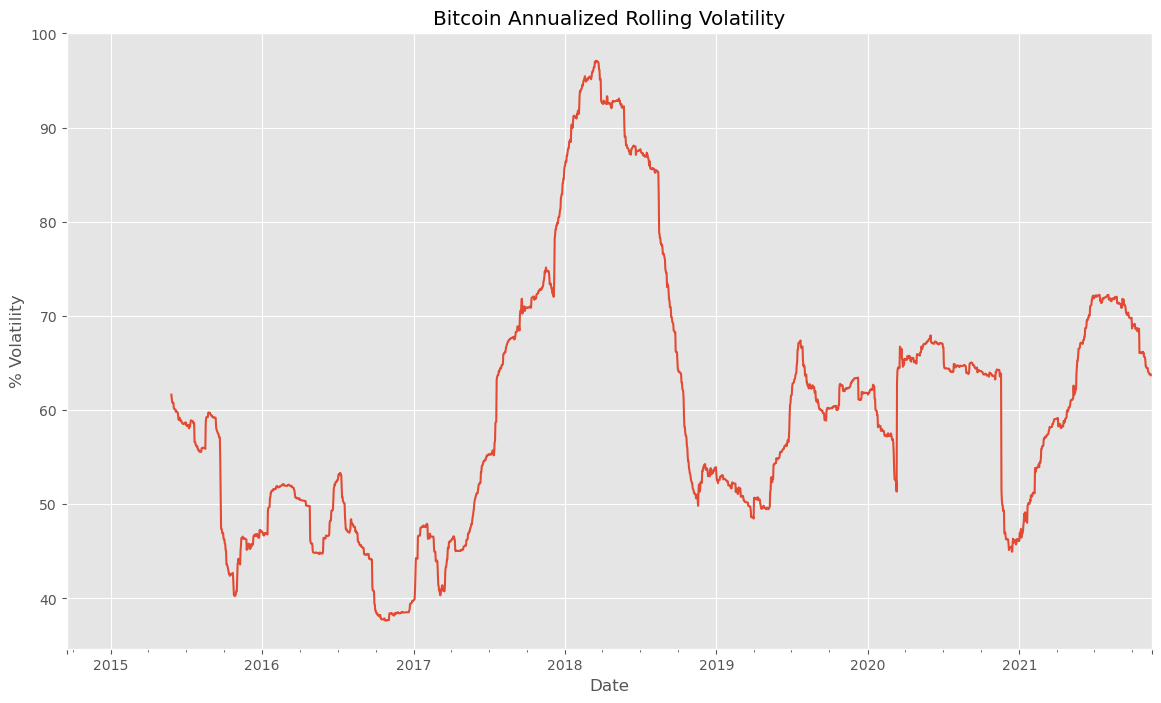

In [17]:
fig, ax = plt.subplots(figsize=(14,8))
yearly_rolling_volatility.plot()
plt.xlabel("Date")
plt.ylabel("% Volatility")
plt.title("Bitcoin Annualized Rolling Volatility")
plt.show()

The standard deviation / volatility of price change in percentage per year indicates high volatility in bitcoin's long-term price changes.

Before I begin to compare Bitcoin's metrices with the selected indices, I would like to have a look at the Average True Range of Bitcoin's price.

In [18]:
def calculate_atr(data, window=5):
  """
  This function calculates the Average True Range (ATR) for a given DataFrame.

  Args:
      data (pandas.DataFrame): DataFrame containing daily price data with columns for 'High', 'Low', 'Close'.
      window (int, optional): The window size for ATR calculation. Defaults to 14.

  Returns:
      pandas.Series: A Series containing the ATR values for each day.
  """
  high_low = data['high'] - data['low']
  high_close = abs(data['high'] - data['close'].shift(1))
  low_close = abs(data['low'] - data['close'].shift(1))
  true_range = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
  atr = true_range.rolling(window=window).mean()
  return atr.dropna()

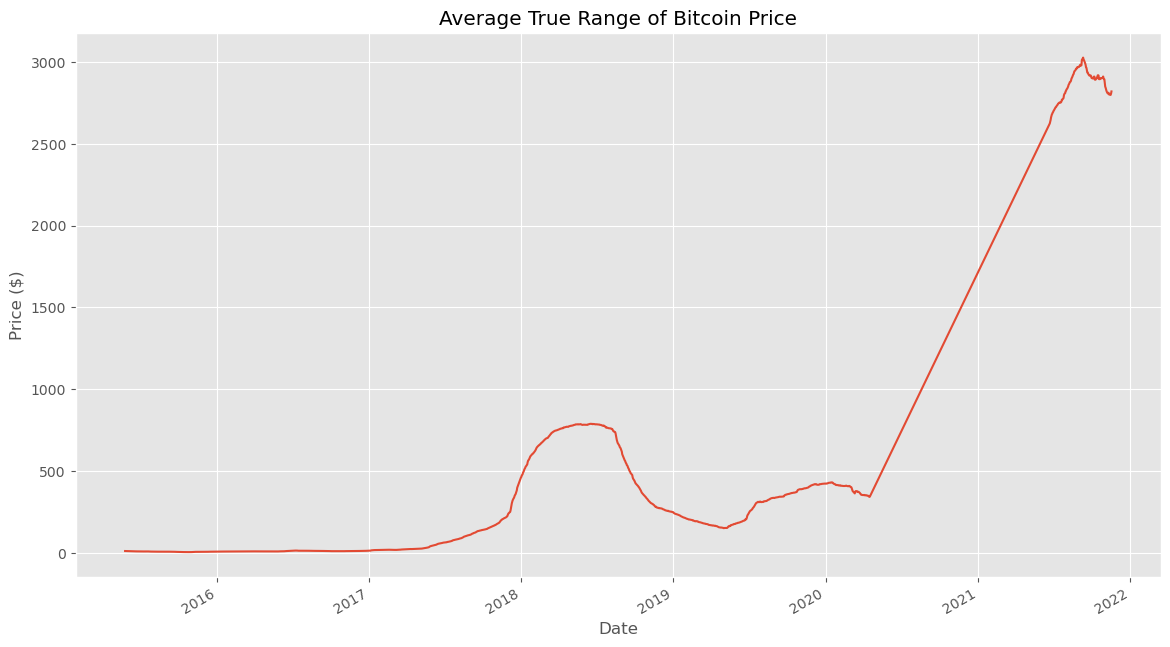

In [19]:
fig, ax = plt.subplots(figsize=(14, 8))
calculate_atr(data=bitcoin.copy(), window=252).plot()
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.title("Average True Range of Bitcoin Price")
plt.show()

After March 12 2020, Bitcoin's price was rising with very few dips on average. This is reflected by the steady rise in the Average True Range, suggesting a period of great uncertainity in Bitcoin's price. It is after this day that is known as **Black Thursday** that the price of Bitcoin started to fluctuate more widely than ever experienced before.

#### Comparing Bitcoin and other indices

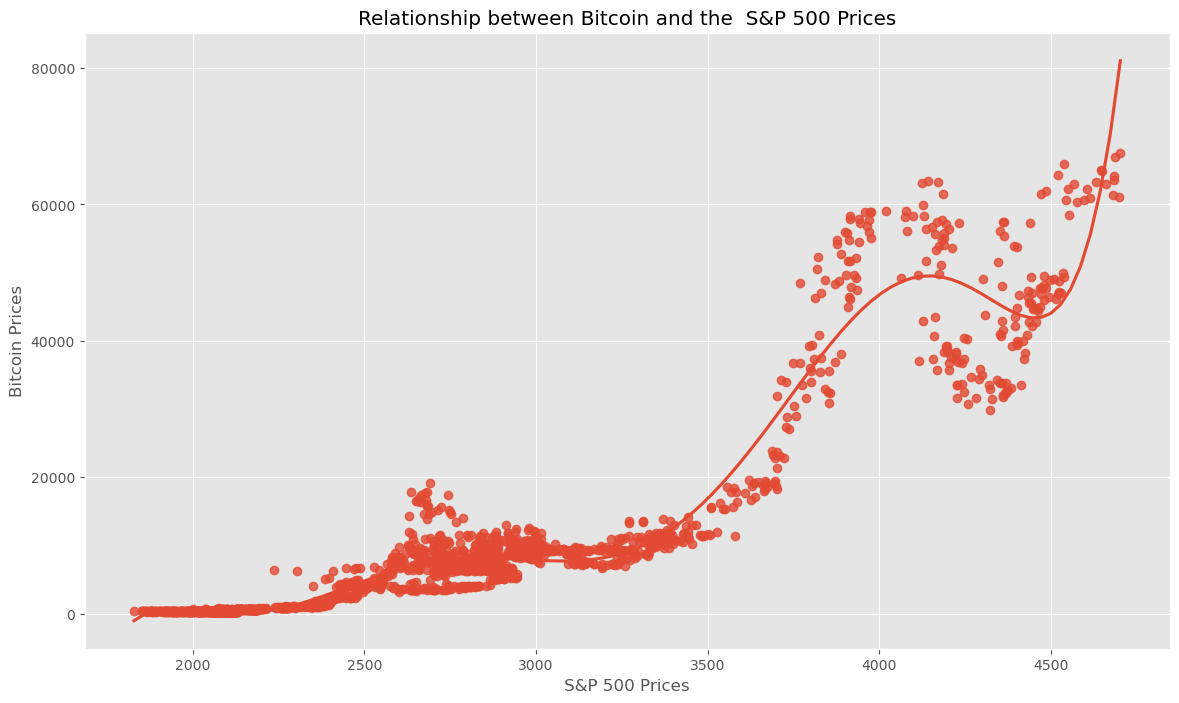

In [54]:
#Merging all dataframes into one for easier analysis
full_df = bitcoin.merge(sp500, how='left', on='date', suffixes=['_bitcoin', '_sp500'])
full_df.dropna()

fig, ax = plt.subplots(figsize=(14, 8))
sns.regplot(data=full_df, x='close_sp500', y='close_bitcoin', ax=ax, order=7, ci=None)
plt.ylabel("Bitcoin Prices")
plt.xlabel("S&P 500 Prices")
plt.title("Relationship between Bitcoin and the  S&P 500 Prices")
plt.show()

The relationship between Bitcoin and the S&P 500 has been evolving. There have been periods of weak correlation, but also times when their prices moved in tandem. This suggests that investor sentiment can influence both markets.

In [72]:
display("Pearson Coefficient",full_df[['close_sp500', 'close_bitcoin']].corr())
display("Spearman Coefficient",full_df[['close_sp500', 'close_bitcoin']].corr(method="spearman"))
display("Kendall Coefficient",full_df[['close_sp500', 'close_bitcoin']].corr(method="kendall"))

'Pearson Coefficient'

,close_sp500,close_bitcoin
close_sp500,1.000000,0.891578
close_bitcoin,0.891578,1.000000


'Spearman Coefficient'

,close_sp500,close_bitcoin
close_sp500,1.000000,0.935981
close_bitcoin,0.935981,1.000000


'Kendall Coefficient'

,close_sp500,close_bitcoin
close_sp500,1.000000,0.782167
close_bitcoin,0.782167,1.000000


- Pearson coefficient (0.89191): This is a very high positive correlation. It signifies that the prices of Bitcoin and S&P 500 tend to move in the same direction, with a near-linear relationship.
- Spearman coefficient (0.936252): This is an even stronger positive correlation compared to Pearson's. It considers the direction of change (up or down) rather than the magnitude, indicating a very strong alignment in price movements.
- Kendall coefficient (0.782386): This coefficient is also positive but slightly lower than the others. It focuses on the order of changes, meaning that if Bitcoin goes up, S&P 500 is more likely to go up as well, and vice versa. However, the strength of this relationship is not quite as high as the other two coefficients.

All three coefficients point towards a strong positive correlation between Bitcoin and S&P 500 prices. Prices tend to move in the same direction (up or down) most of the time. Spearman's coefficient suggests the strongest directional alignment, while Kendall's indicates a slightly weaker but still positive association.

In [122]:
full_df['daily_returns_sp500'] = full_df['close_sp500'].pct_change() * 100
full_df['daily_returns_bitcoin'] = full_df['close_bitcoin'].pct_change() * 100

full_df['weekly_rolling_volatility_sp'] = full_df['daily_returns_sp500'].rolling(window=5).std() * np.sqrt(252)
full_df['weekly_rolling_volatility_btc'] = full_df['daily_returns_bitcoin'].rolling(window=5).std() * np.sqrt(252)

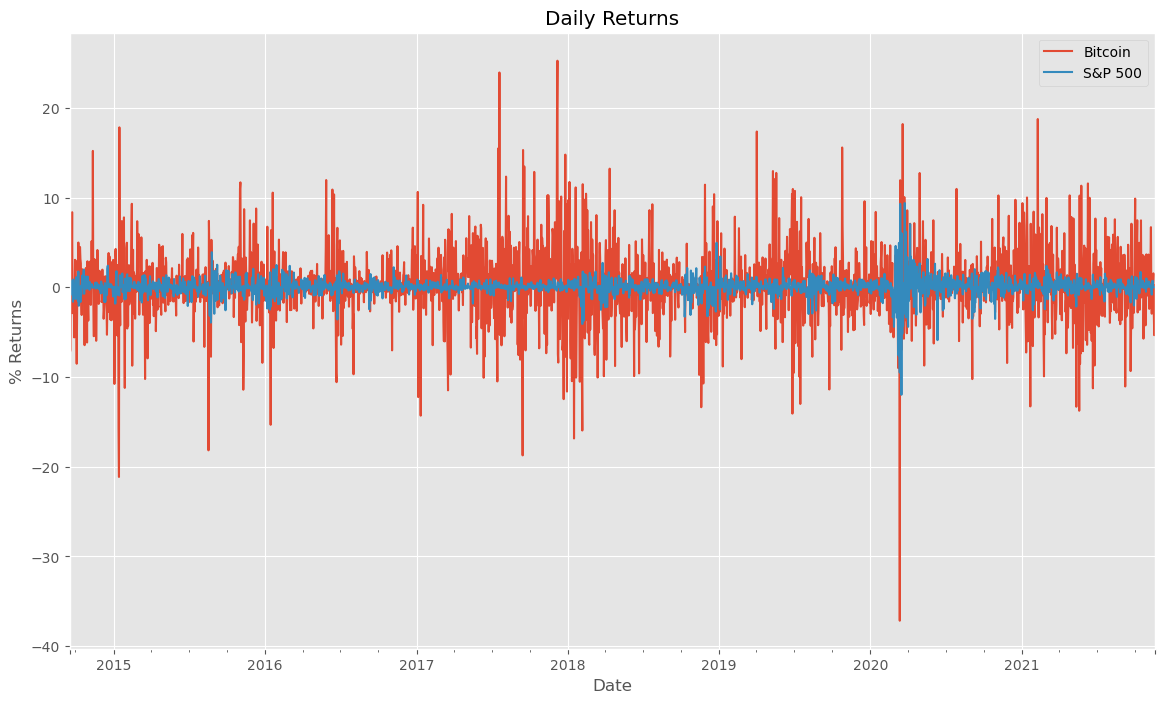

In [65]:
fig, ax = plt.subplots(figsize=(14,8))
full_df['daily_returns_bitcoin'].plot(legend=True, label="Bitcoin")
full_df['daily_returns_sp500'].plot(legend=True, label="S&P 500")
plt.xlabel("Date")
plt.ylabel("% Returns")
plt.title("Daily Returns")
plt.show()

Bitcoin's average daily return is higher than the S&P 500, but this comes with the risk of larger potential losses.

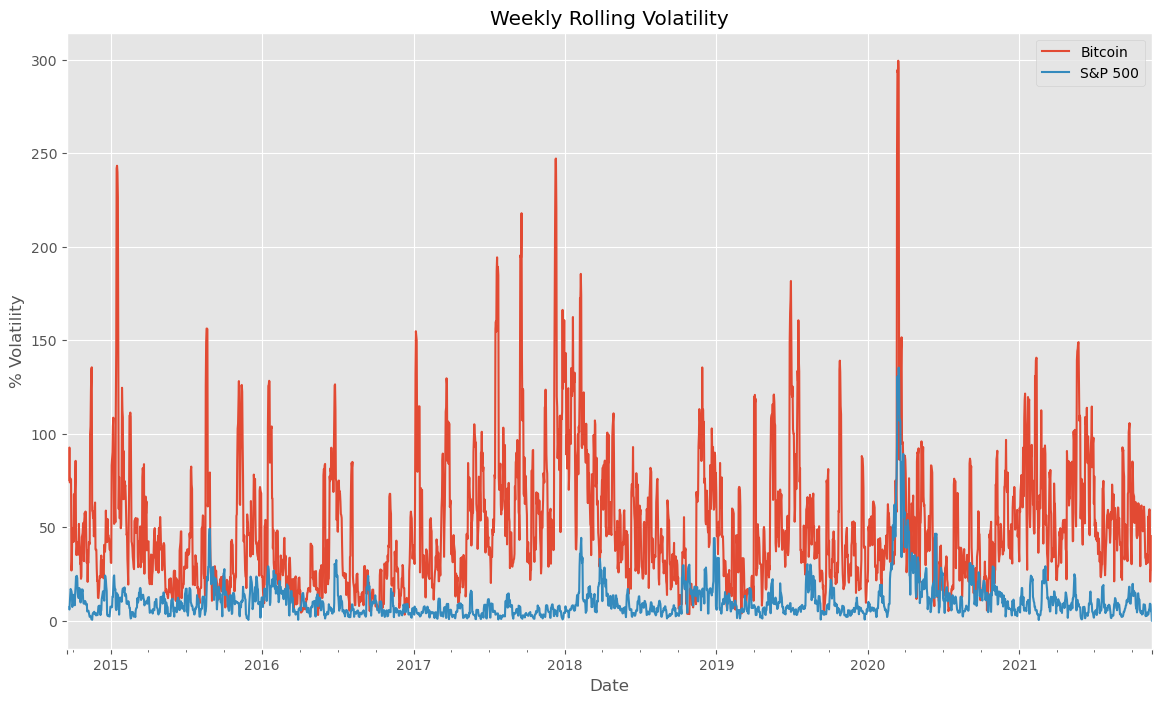

In [66]:
fig, ax = plt.subplots(figsize=(14,8))
full_df['weekly_rolling_volatility_btc'].plot(legend=True, label="Bitcoin")
full_df['weekly_rolling_volatility_sp'].plot(legend=True, label="S&P 500")
plt.xlabel("Date")
plt.ylabel("% Volatility")
plt.title("Weekly Rolling Volatility")
plt.show()

Both Bitcoin and the S&P 500 experience periods of higher and lower volatility throughout the timeframe. For Bitcoin, these fluctuations are more pronounced due to its inherent characteristics.

In [76]:
#Merging all dataframes into one for easier analysis
full_df = full_df.merge(gold_cpi, how='left', on='date')
#Imputing the Gold CPI price on the 17th of September in 2014
full_df['gold_usd'].iloc[0] = gold_cpi['gold_usd'][0]
full_df['cpi_us'].iloc[0] = gold_cpi['cpi_us'][0]
#Filling missing values with the last known price
full_df = full_df.fillna(method='ffill')
#Investigating monthly and yearly means
monthly_mean = full_df[['close_bitcoin', 'close_sp500', 'gold_usd', 'cpi_us']].groupby(full_df.index.month).mean()
yearly_mean = full_df[['close_bitcoin', 'close_sp500', 'gold_usd', 'cpi_us']].groupby(full_df.index.year).mean()

C:\Users\raksk\AppData\Local\Temp\ipykernel_13804\157691588.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df['gold_usd'].iloc[0] = gold_cpi['gold_usd'][0]
C:\Users\raksk\AppData\Local\Temp\ipykernel_13804\157691588.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df['cpi_us'].iloc[0] = gold_cpi['cpi_us'][0]


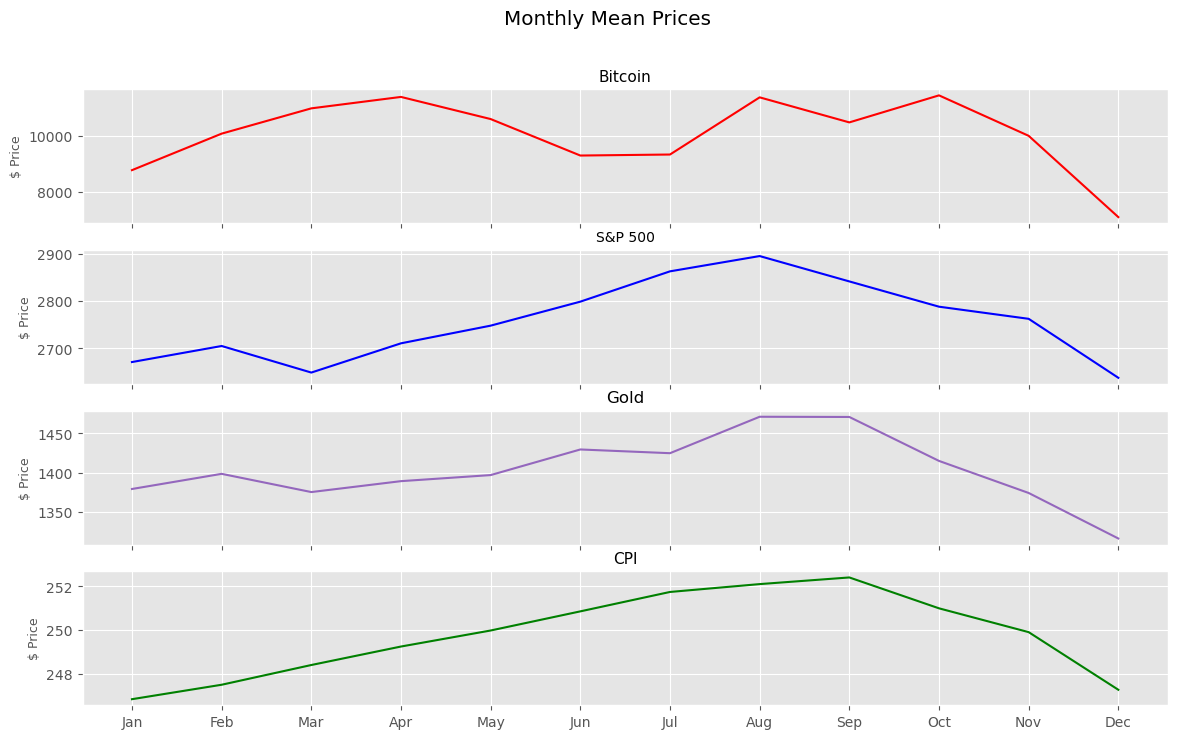

In [115]:
#Visualizing monthly means
fig, axs = plt.subplots(4, 1, figsize=(14, 8), sharex=True)
axs[0].plot(monthly_mean['close_bitcoin'], color="red")
axs[0].set_title("Bitcoin", fontsize=11)
axs[0].set_ylabel("$ Price", fontsize=9)
axs[1].plot(monthly_mean['close_sp500'], color="blue")
axs[1].set_title("S&P 500", fontsize=10)
axs[1].set_ylabel("$ Price", fontsize=9)
axs[2].plot(monthly_mean['gold_usd'], color='tab:purple')
axs[2].set_title("Gold", fontsize=12)
axs[2].set_ylabel("$ Price", fontsize=9)
axs[3].plot(monthly_mean['cpi_us'], color="green")
axs[3].set_title("CPI", fontsize=11)
axs[3].set_ylabel("$ Price", fontsize=9)
axs[3].set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
                  labels=["Jan","Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
fig.suptitle("Monthly Mean Prices", fontsize="x-large")
plt.show()

There is a common upward trend that starts in the month of July and peaks in August. This trend could be attributed by a few factors including lower trading volumes due to summer vacations in the northern hemisphere. This leads to higher volatility and price swings, with July initiating the trend and August experiencing the peak of such behavior. Another factor could be End of Month Portfolio Rebalancing. If some investment funds rebalance quarterly, the end of July might be a target for adjustments to meet their target asset allocation. This buying activity could push prices up in July, with August reflecting the full impact.

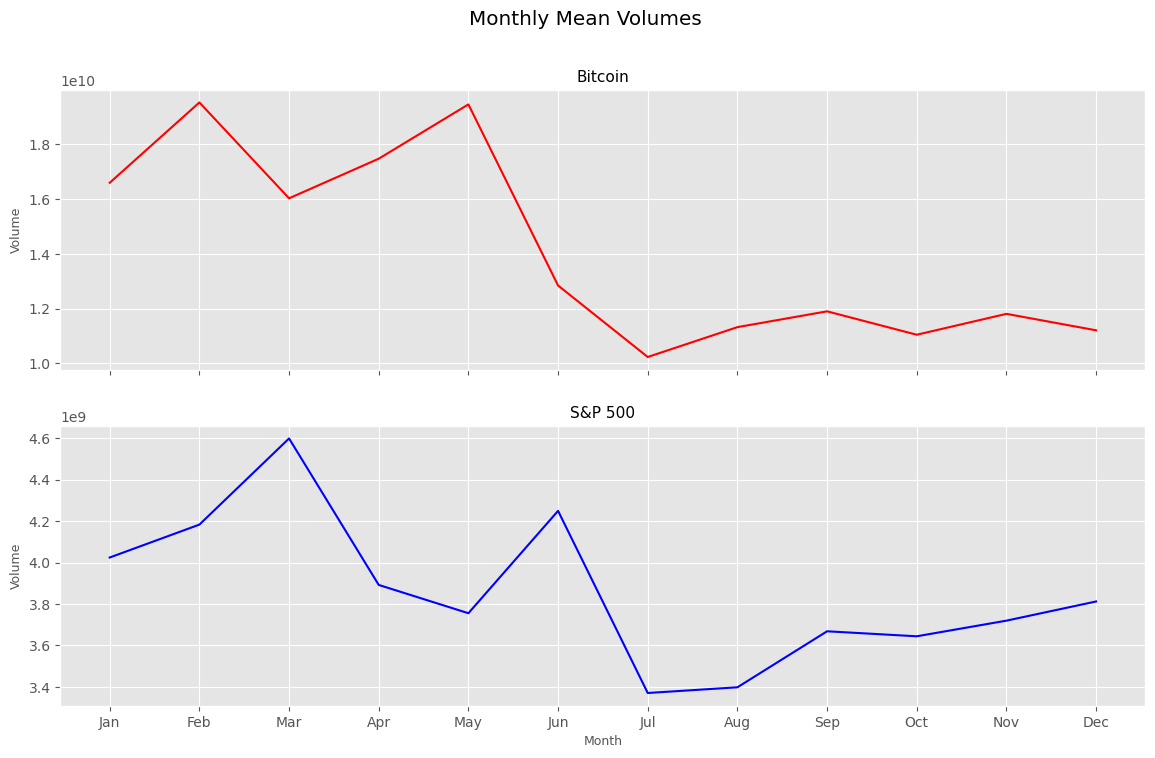

In [113]:
#Inspecting the monthly volume average of Bitcoin and S&P 500
monthly_vol_mean = full_df[['volume_bitcoin', 'volume_sp500',]].groupby(full_df.index.month).mean()
fig, axs = plt.subplots(2, 1, figsize=(14, 8), sharex=True)
axs[0].plot(monthly_vol_mean['volume_bitcoin'], color="red")
axs[0].set_title("Bitcoin", fontsize=11)
axs[0].set_ylabel("Volume", fontsize=9)
axs[1].plot(monthly_vol_mean['volume_sp500'], color="blue")
axs[1].set_title("S&P 500", fontsize=11)
axs[1].set_ylabel("Volume", fontsize=9)
axs[1].set_xlabel("Month", fontsize=9)
axs[1].set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
                  labels=["Jan","Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
fig.suptitle("Monthly Mean Volumes", fontsize="x-large")
plt.show()

As expected, there is a significant drop in volume tradings towards the month of July in both Bitcoin and the top 500 companies enlisted in the S&P 500.

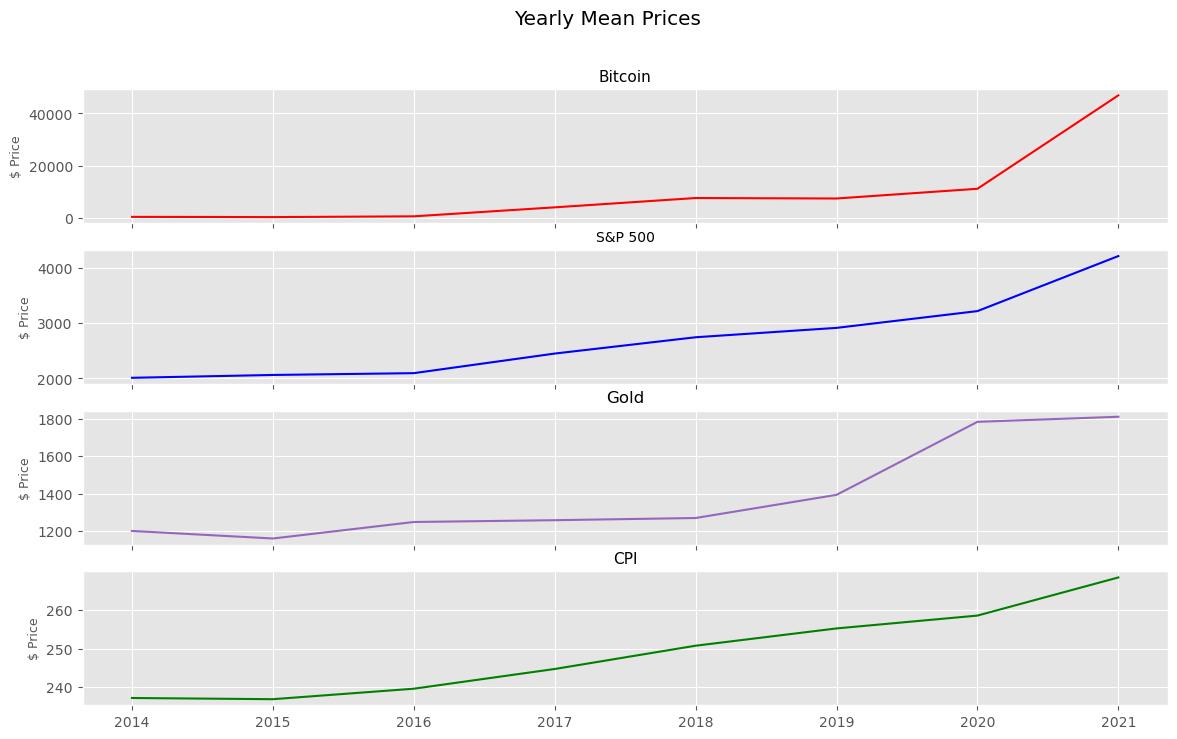

In [116]:
#Visualizing yearly means
fig, axs = plt.subplots(4, 1, figsize=(14, 8), sharex=True)
axs[0].plot(yearly_mean['close_bitcoin'], color="red")
axs[0].set_title("Bitcoin", fontsize=11)
axs[0].set_ylabel("$ Price", fontsize=9)
axs[1].plot(yearly_mean['close_sp500'], color="blue")
axs[1].set_title("S&P 500", fontsize=10)
axs[1].set_ylabel("$ Price", fontsize=9)
axs[2].plot(yearly_mean['gold_usd'], color='tab:purple')
axs[2].set_title("Gold", fontsize=12)
axs[2].set_ylabel("$ Price", fontsize=9)
axs[3].plot(yearly_mean['cpi_us'], color="green")
axs[3].set_title("CPI", fontsize=11)
axs[3].set_ylabel("$ Price", fontsize=9)
fig.suptitle("Yearly Mean Prices", fontsize="x-large")
plt.show()

It seems the Gold price experienced a drop between the years 2014 and 2015.

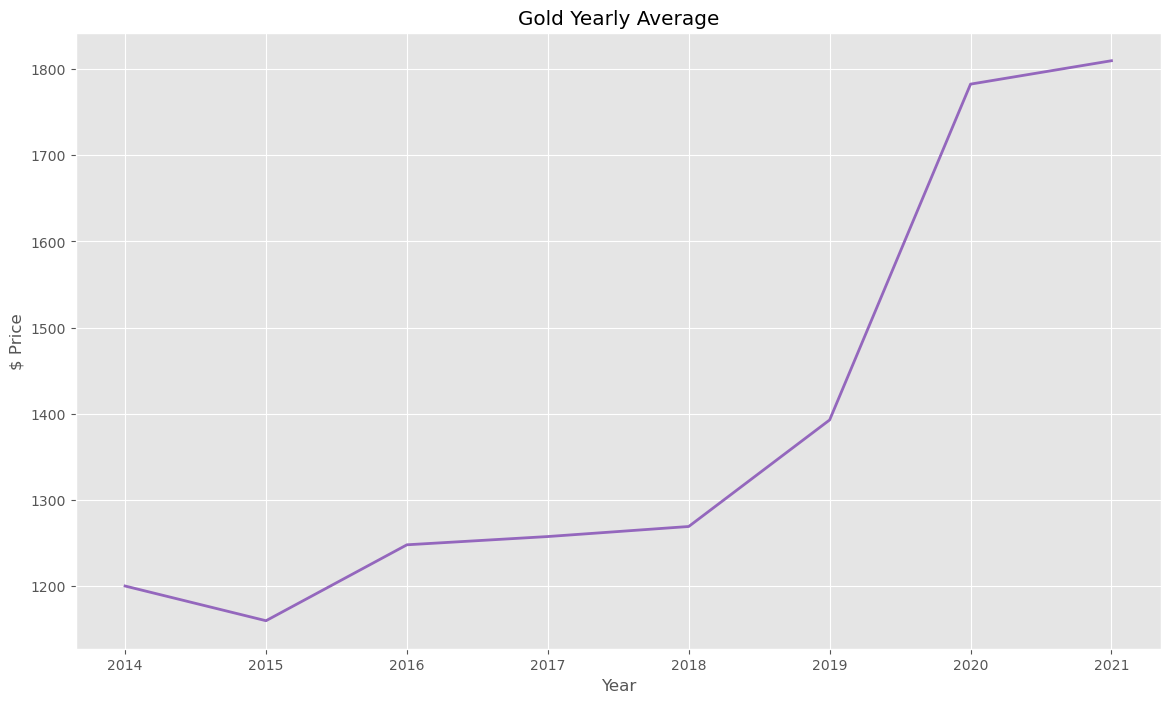

In [123]:
#A closer look at the gold yearly average price
fig = plt.figure(figsize=(14,8))
plt.plot(yearly_mean.index, yearly_mean['gold_usd'], linewidth=2.0, c='tab:purple')
plt.title('Gold Yearly Average')
plt.xlabel('Year')
plt.ylabel('$ Price')
plt.show()

Between the years 2014 and 2015, there was a shift in investor sentiment that was caused by an improvement in the global economy. This outlook towrds the economy lead investors to move away from safe-haven assets like gold and move towards more riskier assets like stocks as these tend to offer higher returns.

In this period, there was an expectation in interest rates to rise. The U.S. Federal Reserve began signaling its intention to raise interest rates after keeping them near zero for several years post-2008 recession. This anticipation of rising rates made gold, which doesn't offer any interest income, less attractive to investors.

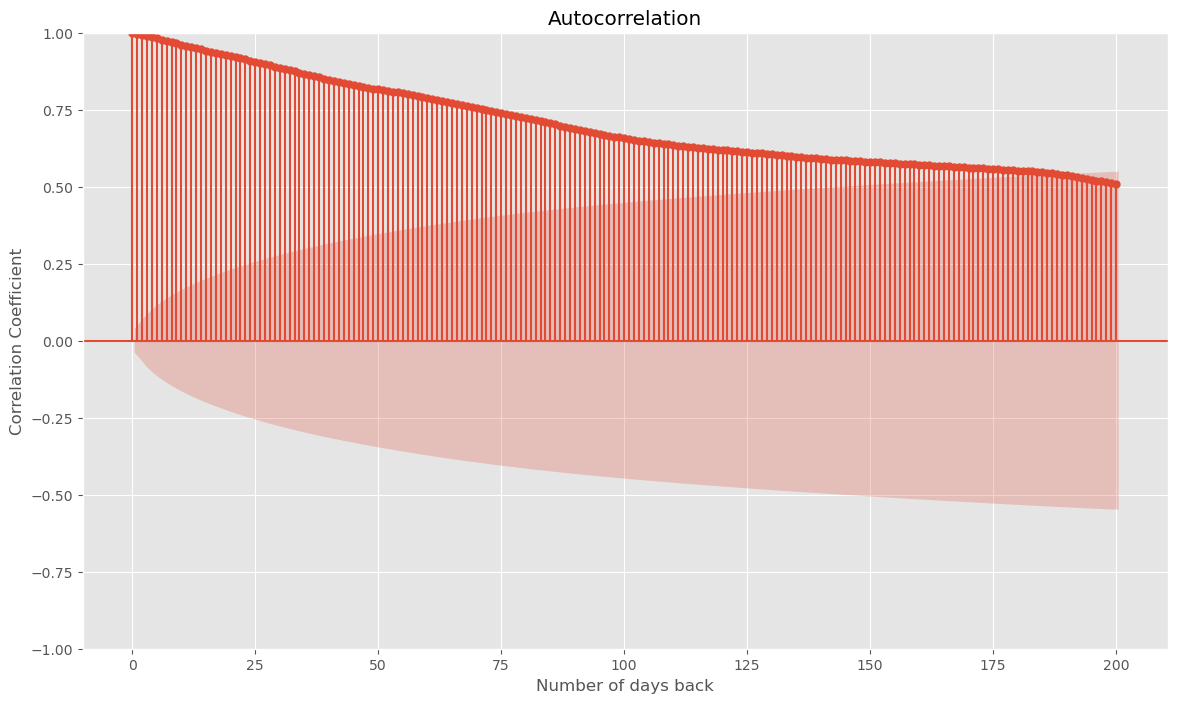

In [124]:
fig, ax = plt.subplots(figsize=(14, 8))
plot_acf(full_df['close_bitcoin'], lags=200, ax=ax)
ax.set_xlabel('Number of days back')
ax.set_ylabel('Correlation Coefficient')
plt.show()

Bitcoin prices, from over 175 days are highly correlated to the most recent price suggesting that a price from 175 days ago plays a role in influencing bitcoin's current price.

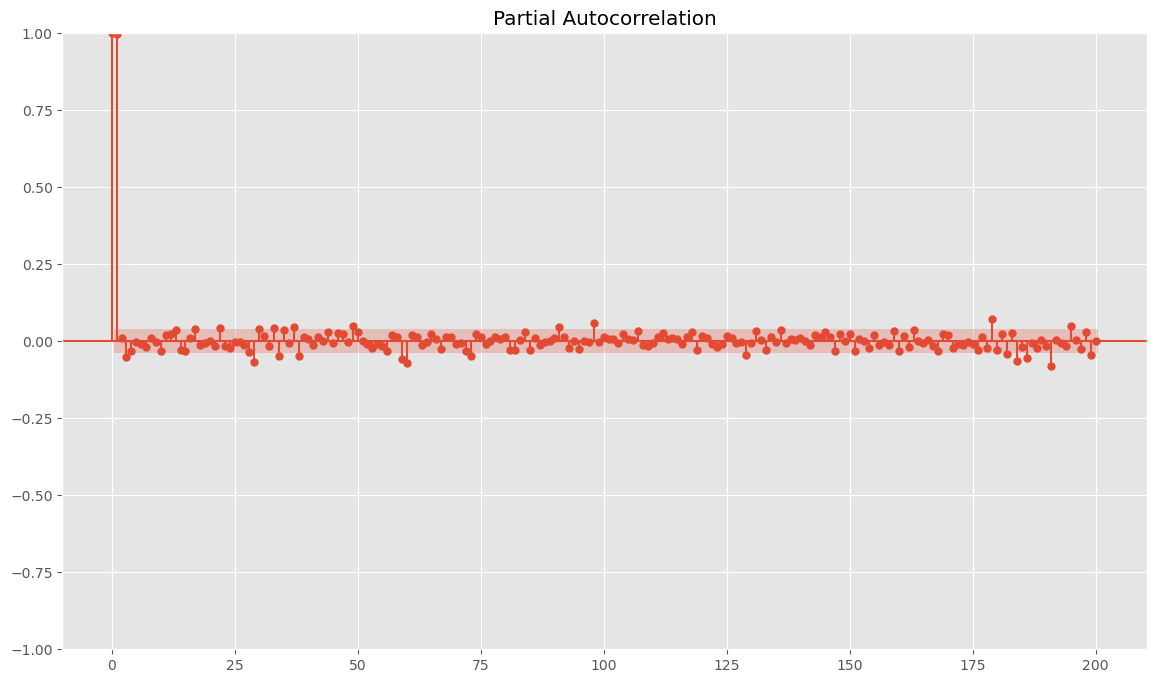

In [125]:
fig, ax = plt.subplots(figsize=(14, 8))
plot_pacf(full_df['close_bitcoin'], lags=200, ax=ax, method="ywm")
plt.show()

Dips after 29, 58, 59, and 190 days: These negative spikes at specific lags (29, 58, 59, 190 days) imply that the price tends to decrease after these time intervals. There could be several reasons behind this:
- Perhaps there are recurring events happening around these timeframes that cause the price to fall. This could be related to things like scheduled news announcements, halving events (predetermined reductions in new bitcoin issuance), or tax cycles in certain countries.
- It might be due to seasonal trends. For instance, there could be less trading activity during specific holidays or quarters, leading to price drops.

Spikes after 97 and 179 days: Conversely, the positive spikes at lags 97 and 179 days suggest the price tends to increase after those durations. This could be due to:
- Positive events that typically occur around these lags, leading to price hikes. This could be related to conferences, positive news announcements, or increased institutional buying.
- It's also possible that price drops after 29, 58, 59, and 190 days are followed by corrections or mean reversion, causing the price to rise back up after some time (around 97 and 179 days).

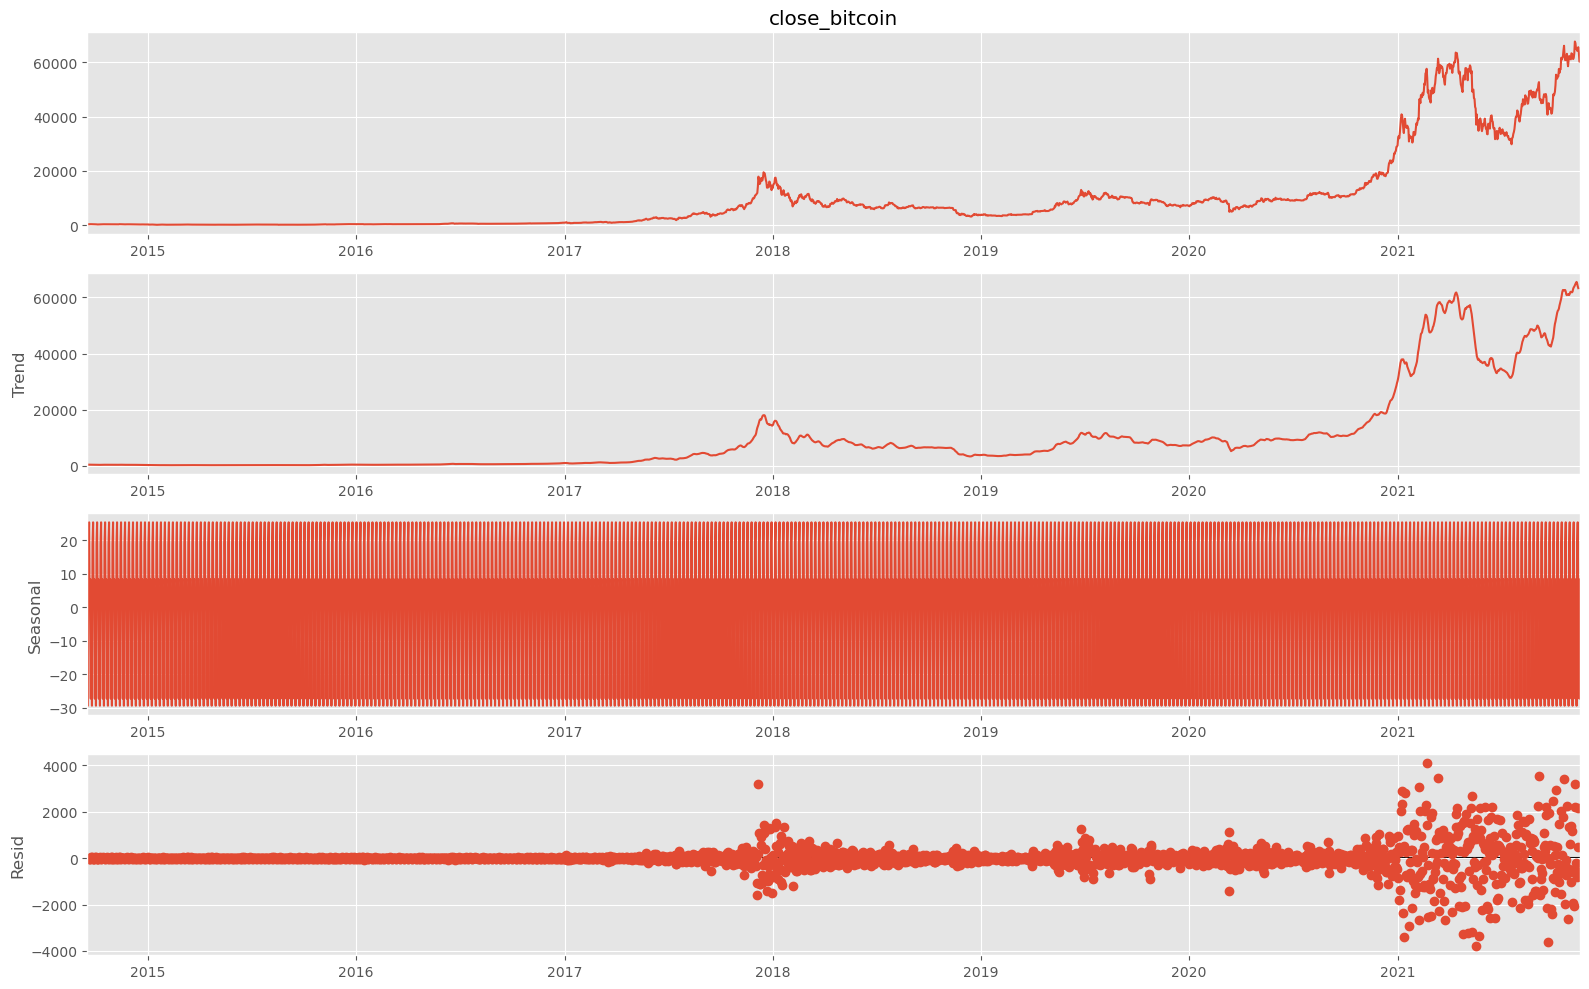

In [120]:
from pylab import rcParams

rcParams['figure.figsize'] = 16, 10
decomposition = sm.tsa.seasonal_decompose(full_df['close_bitcoin'])
fig = decomposition.plot()
plt.show()

## 4.0 Feature Engineering

In [19]:
sp500_merged = bitcoin.merge(sp500, how='left', on='date', suffixes=['_bitcoin', '_sp500'])
sp500_merged.head()

,date,open_bitcoin,high_bitcoin,low_bitcoin,close_bitcoin,volume_bitcoin,open_sp500,high_sp500,low_sp500,close_sp500,volume_sp500
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800.0,1999.300049,2010.739990,1993.290039,2001.569946,3.209420e+09
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200.0,2003.069946,2012.339966,2003.069946,2011.359985,3.235340e+09
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700.0,2012.739990,2019.260010,2006.589966,2010.400024,4.880220e+09
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600.0,NaN,NaN,NaN,NaN,NaN
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100.0,NaN,NaN,NaN,NaN,NaN


In [23]:
sp500_merged.shape

(2619, 11)

## 5.0 Modeling / Training

In [31]:
bitcoin.dropna(inplace=True)

In [33]:
X = bitcoin.drop(['close', 'date'], axis=1).values
y = bitcoin['close'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

model = LinearSVR()

model.fit(X_train, y_train)

c:\Users\raksk\anaconda3\envs\snowflakes\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\raksk\anaconda3\envs\snowflakes\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR()

In [34]:
y_pred = model.predict(X_test)
model.score(X_test, y_test)

-1478.4593038402165

## 6.0 Model Evaluation

## 7.0 Submissions

## 8.0 Conclusion

## 9.0 Recommendations

## References

Edwards, J. (2024) Bitcoin's Price History. Available at: https://www.investopedia.com/articles/forex/121815/bitcoins-price-history.asp (Accessed 14 June 2024).